## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [88]:
#importing pandas and sklearn.metrics library of python
import pandas as pd
import sklearn.metrics as skm

In [89]:
#reading the students-data.csv and adding a separartor ";" as the data in csv is separated by ";"
students_data = pd.read_csv("students-data.csv",sep=";")
#fetching the first 5 rows of the dataset
students_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [90]:
#setting the index of the dataset to "number"
students_data.index.name = "number"
students_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [91]:
#describing the dataset to check if any of the fields as all the min,25%,50%,75% etc as 0 which implies that the data
#has only 1 single value through the rows and hence not significant.
students_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [92]:
#fetching the dimension of the dataset
students_data.shape

(395, 33)

In [188]:
#checking if any value in dataset is null column-wise and adding a count of that
students_data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [94]:
#fetching the attributes from dataset which are not numbers, adding exclude attribute removes numbers from the result
students_data.select_dtypes(exclude='number').head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [95]:
#checking the columns that has variance less than 1
students_data.var() < 1

age           False
Medu          False
Fedu          False
traveltime     True
studytime      True
failures       True
famrel         True
freetime       True
goout         False
Dalc           True
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [96]:
#dropping the columns with variance less than 1 and storing it in a new dataframe "preprocessed_students_data"
preprocessed_students_data = students_data.drop(students_data.var()[students_data.var() < 1].index.values,axis=1)

In [97]:
preprocessed_students_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10


## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [98]:
#importing the preprocessing module from sklearn
import sklearn.preprocessing as preprocessing
le = preprocessing.LabelEncoder()

#looping through the non-numerical columns in the dataframe and using label encoder to encode their labels
for cols in preprocessed_students_data.select_dtypes(exclude='number').columns:
    preprocessed_students_data[cols] = le.fit_transform(preprocessed_students_data[cols])
    
preprocessed_students_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [112]:
#importing numpy library of python
import numpy as np
#querying to serach for entires in column G1,G2,G3 with values greater than or equal to 10 and encoding them in binary
processed_data = pd.DataFrame(np.where(preprocessed_students_data >= 10,1,0), columns=preprocessed_students_data.columns)

In [113]:
processed_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [118]:
#selecting all the rows and 1st to 26th column as source feature
X = processed_data.iloc[:,0:26]
#selecting all the rows and 27th column as target feature
Y = processed_data['G3']

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

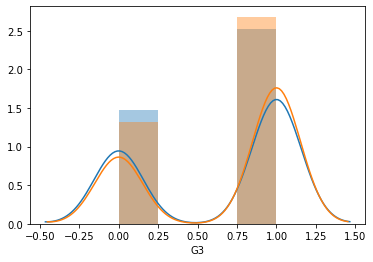

In [122]:
#importing seaborn library for ploting
import seaborn as sns
sns.distplot(processed_data['G2'])
sns.distplot(Y)


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

In [123]:
#checking the columns available in the dataframe
processed_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'goout',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

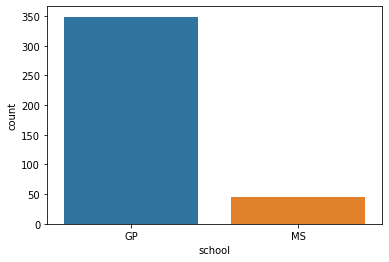

In [132]:
sns.countplot(x="school",data=students_data)

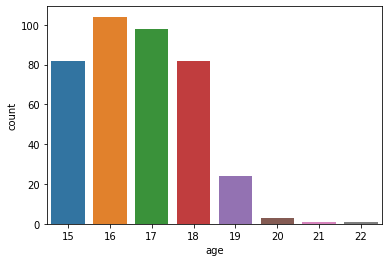

In [133]:
sns.countplot(x="age",data=students_data)

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [137]:
#importing model_selection module from sklearn and splitting the dataset for training and testing
import sklearn.model_selection as selection
X_train,X_test,Y_train,Y_test = selection.train_test_split(X,Y,train_size=300,random_state=1)

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [142]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train,Y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [147]:
predicted_labels = logReg.predict(X_test)
print("The accuracy score of the model:")
skm.accuracy_score(Y_test,predicted_labels)

The accuracy score of the model:


0.9052631578947369

In [148]:
print("The F1 score of the model:")
skm.f1_score(Y_test,predicted_labels)

The F1 score of the model:


0.931297709923664

# Naive bayes with Iris data

### Import Iris.csv

In [222]:
#reading the iris.csv
iris_data = pd.read_csv("iris.csv")
#fetching the first 5 rows of the dataset
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [224]:
#checking the dimension of the dataset
iris_data.shape

(152, 6)

In [226]:
#dropping the ID column as this feature is adding noise in the dataset
iris_data = iris_data.drop("Id",axis=1)

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [278]:
import statistics as stats
#splitting the data set into source feature and target features
y = iris_data['Species']
X = iris_data.iloc[:,0:4]

#replacing all the NaN values in the dataset with mean of the corresponding column
X.fillna(X.mean(),inplace=True)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Find the distribution of target variable (Class)

In [264]:
#counting the number of each type of traget variable in the class
y.value_counts()

Iris-virginica     52
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

### Plot the distribution of target variable using histogram

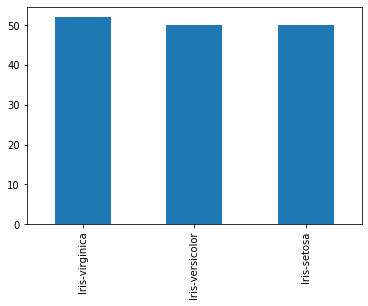

In [279]:
pd.value_counts(iris_data["Species"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


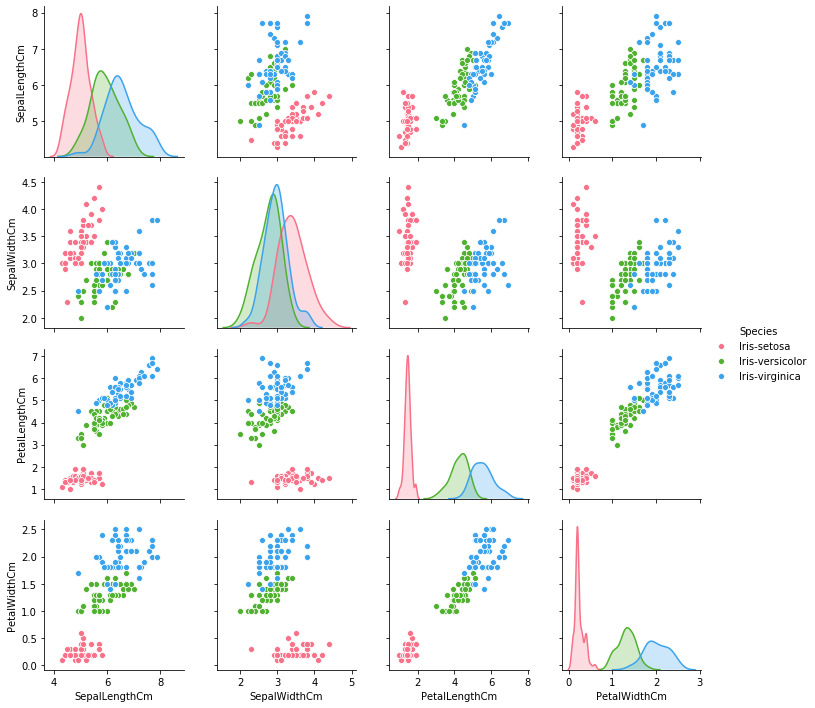

In [280]:
sns.pairplot(iris_data, palette="husl",diag_kind="kde",hue="Species")

`PetalLengthCm and PetalWidthCm gives clear separation of the features in the three varities, hence they are very good feature for creating model.`

### Summary Statistics and explain insights for at least 2 variables

In [281]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,151.000000,150.000000,150.000000,151.000000
mean,5.843709,3.054000,3.758667,1.202649
std,0.825314,0.433594,1.764420,0.762185
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [282]:
iris_data.isnull().sum()

SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

`Insights:`

`1) SepalWidthCm,PetalLengthCm,PetalLengthCm,PetalWidthCm have 1,2,2,1 null values respectively.`

`2) PetalLengthCm has high variation at 50% and hence the standard deviation is higher than other features.`

`3) PetalLengthCm and PetalWidthCm gives clear separation of the features in the three varities, hence they are very good feature for creating model.`

`4) SepalWidthCm on the other hand, has lot of overlapping distribution hence doesn't give a very clear picture on the type of flower.`

### Correlation among all variables and give your insights

In [283]:
mat = iris_data.corr(method='pearson')
mat

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


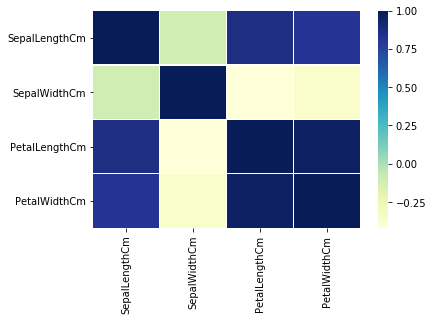

In [284]:
sns.heatmap(mat,cmap="YlGnBu",linewidths=0.1,linecolor="White")

`Insights:`

`1) SepalWidthCm is not linerarly realted to any of the available features.`

`2) SepalLengthCm,PetalLengthCm,PetalLengthCm shows strong liner relation.`


### Split data in Training and Validation in 80:20

In [292]:
#importing model_selection module from sklearn and splitting the dataset for training and testing
import sklearn.model_selection as selection
X_train,X_test,Y_train,Y_test = selection.train_test_split(X,y,test_size=0.20,random_state=0)

### Do Feature Scaling

In [293]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1),copy=False)
fitting_scale = scaler.fit_transform(X)
X = pd.DataFrame(fitting_scale)
X.head()

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


### Train and Fit NaiveBayes Model

In [294]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [295]:
predicted_flowers = clf.predict(X_test)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [296]:
print("The accuracy of the Naive Bayes Model - Predcition Of Flowers:")
skm.accuracy_score(Y_test,predicted_flowers)

The accuracy of the Naive Bayes Model - Predcition Of Flowers:


0.967741935483871

In [297]:
print("The Confusion Matrix for Predcition Of Flowers:")
skm.confusion_matrix(Y_test,predicted_flowers)

The Confusion Matrix for Predcition Of Flowers:


array([[10,  0,  0],
       [ 0,  8,  0],
       [ 0,  1, 12]])

`Conclusion:`

`1) The model predicted correctly all the labels except 1 that is visible in the 2nd row and 2nd column of confusion matrix.`

`2)The feature selected for creating the model were good features which helped in building 96.7% accurate model.`